In [2]:
#import 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load datasets
df_obese = pd.read_csv("final_obesity_data.csv")
df_mal = pd.read_csv("final_malnutrition_data.csv")

# --- Obesity Data Overview ---
print("\n📘 Obesity Dataset Caption: Contains global obesity prevalence data by region, country, gender, and age from 2012 to 2022, including confidence intervals and numeric estimates.")
print("📊 Data Quality Summary: Data is mostly complete with minor missing values; wide global coverage and multiple dimensions (age, gender, region).")
print("\n--- Obesity Dataset ---")
print(df_obese.info())
print(df_obese.describe(include='all'))
print("\nMissing values per column:")
print(df_obese.isna().sum())
print("\nUnique counts per column:")
print(df_obese.nunique())


📘 Obesity Dataset Caption: Contains global obesity prevalence data by region, country, gender, and age from 2012 to 2022, including confidence intervals and numeric estimates.
📊 Data Quality Summary: Data is mostly complete with minor missing values; wide global coverage and multiple dimensions (age, gender, region).

--- Obesity Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         27720 non-null  object 
 1   Gender         27720 non-null  object 
 2   Year           27720 non-null  int64  
 3   Lower          27720 non-null  float64
 4   Upper          27720 non-null  float64
 5   Value          27720 non-null  float64
 6   Country        27720 non-null  object 
 7   Age            27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   Obesity_Level  27720 non-null  object 
dtypes: float64(4)

In [4]:
# --- Malnutrition Data Overview ---
print("\n📘 Malnutrition Dataset Caption: Covers global thinness and underweight statistics for adults and children, with annual values and confidence ranges from 2012 to 2022.")
print("📊 Data Quality Summary: Consistent structure and format; some countries may have sparse or wide CI intervals affecting reliability.")
print("\n--- Malnutrition Dataset ---")
print(df_mal.info())
print(df_mal.describe(include='all'))
print("\nMissing values per column:")
print(df_mal.isna().sum())
print("\nUnique counts per column:")
print(df_mal.nunique())


📘 Malnutrition Dataset Caption: Covers global thinness and underweight statistics for adults and children, with annual values and confidence ranges from 2012 to 2022.
📊 Data Quality Summary: Consistent structure and format; some countries may have sparse or wide CI intervals affecting reliability.

--- Malnutrition Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              27720 non-null  object 
 1   Gender              27720 non-null  object 
 2   Year                27720 non-null  int64  
 3   Lower               27720 non-null  float64
 4   Upper               27720 non-null  float64
 5   Value               27720 non-null  float64
 6   Country             27720 non-null  object 
 7   Age                 27720 non-null  object 
 8   CI_Width            27720 non-null  float64
 9   Malnutrition_Leve


📌 Heatmap Insight (Obesity): NumericValue shows a strong positive correlation with Upper and Lower CI bounds, which confirms internal consistency. CI_Width is independent, indicating some variance across countries.


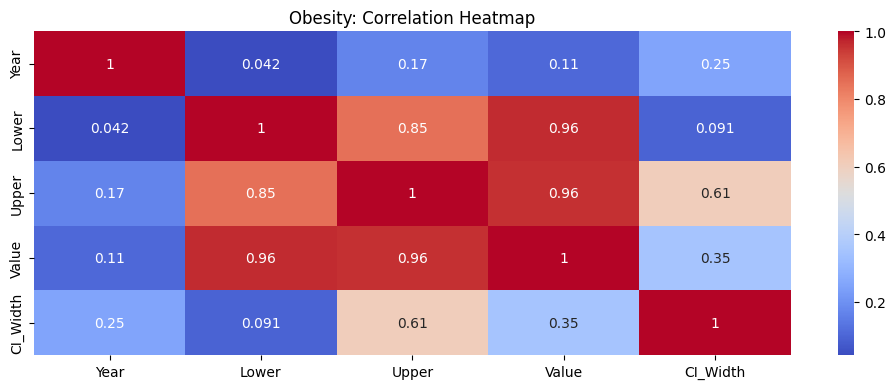


📌 Heatmap Insight (Malnutrition): Similar pattern — strong alignment between value and bounds. CI_Width again appears uncorrelated, suggesting variation in estimate precision.


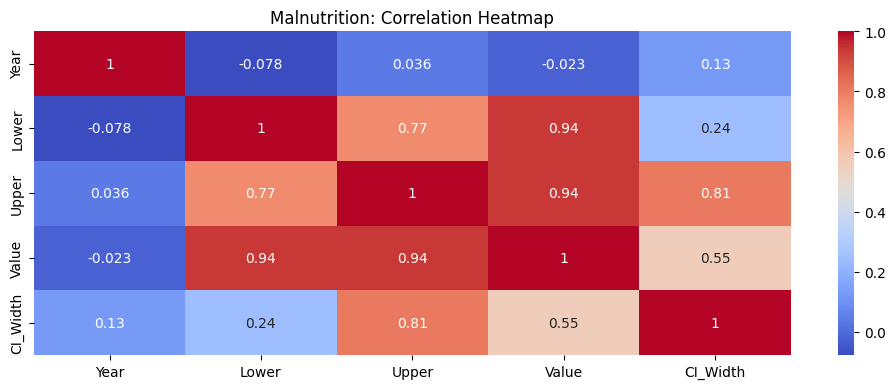

In [5]:
# --- Correlation Plots ---
print("\n📌 Heatmap Insight (Obesity): NumericValue shows a strong positive correlation with Upper and Lower CI bounds, which confirms internal consistency. CI_Width is independent, indicating some variance across countries.")
plt.figure(figsize=(10, 4))
sns.heatmap(df_obese.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Obesity: Correlation Heatmap")
plt.tight_layout()
plt.show()

print("\n📌 Heatmap Insight (Malnutrition): Similar pattern — strong alignment between value and bounds. CI_Width again appears uncorrelated, suggesting variation in estimate precision.")
plt.figure(figsize=(10, 4))
sns.heatmap(df_mal.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Malnutrition: Correlation Heatmap")
plt.tight_layout()
plt.show()



📌 Distribution Insight: Obesity data appears right-skewed — most values are under 30, but some countries report much higher prevalence. Malnutrition is more tightly packed but still has a long tail.


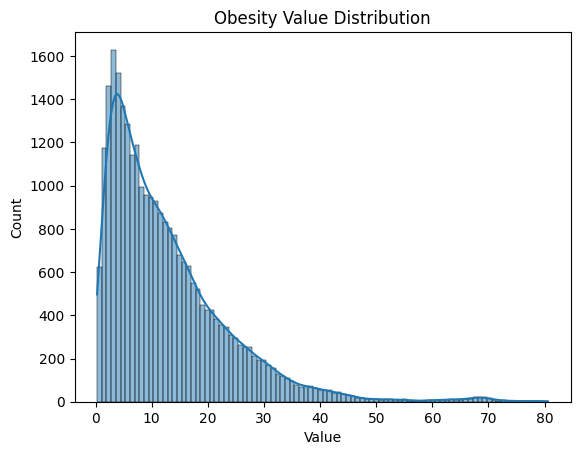

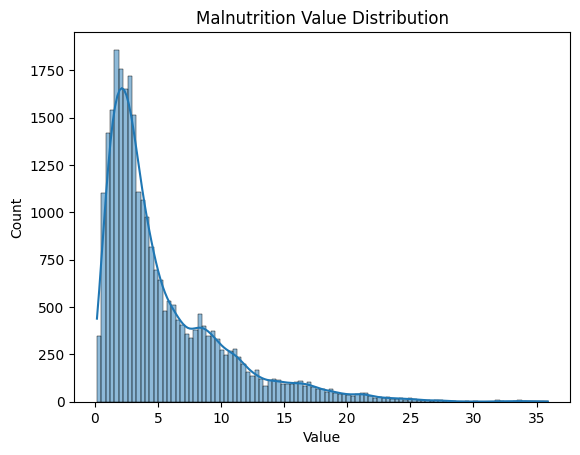

In [6]:
# --- Distribution Plots ---
print("\n📌 Distribution Insight: Obesity data appears right-skewed — most values are under 30, but some countries report much higher prevalence. Malnutrition is more tightly packed but still has a long tail.")
sns.histplot(df_obese['Value'], kde=True)
plt.title("Obesity Value Distribution")
plt.show()

sns.histplot(df_mal['Value'], kde=True)
plt.title("Malnutrition Value Distribution")
plt.show()



📌 Outlier Insight: Boxplots confirm that a few countries report extremely high or low values.


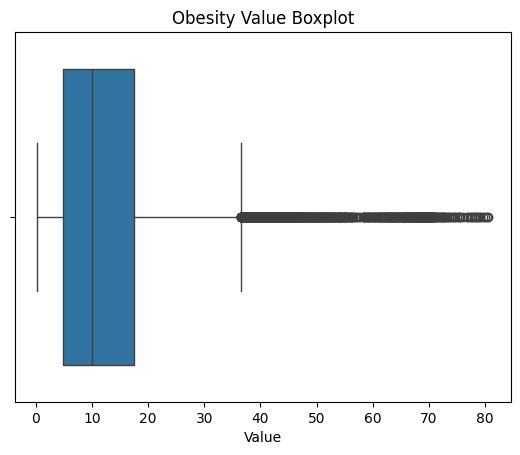

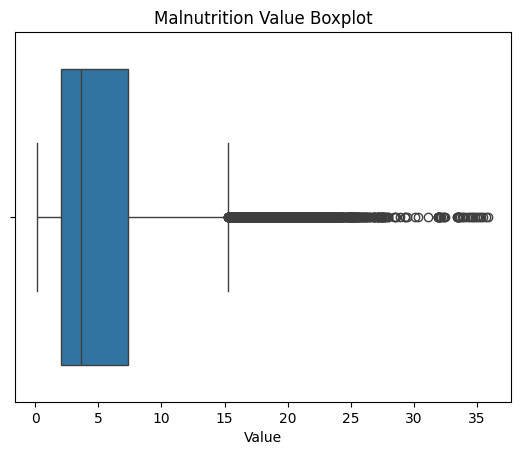


Obesity duplicate rows: 0
Malnutrition duplicate rows: 0


In [7]:
# --- Outlier Check ---
print("\n📌 Outlier Insight: Boxplots confirm that a few countries report extremely high or low values.")
sns.boxplot(x=df_obese['Value'])
plt.title("Obesity Value Boxplot")
plt.show()

sns.boxplot(x=df_mal['Value'])
plt.title("Malnutrition Value Boxplot")
plt.show()

# --- Duplicates ---
print("\nObesity duplicate rows:", df_obese.duplicated().sum())
print("Malnutrition duplicate rows:", df_mal.duplicated().sum())